In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/Users/ljs/smart_farm/smart_farm/00 ETC/2122_plant_sum_week.csv')
df.drop('Unnamed: 33', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df

,co2,dp,hd,hmdt,hmdt_abs,hmdt_sat,ior,temp,vpd,img_growth_length,...,man_stem_diameter,man_fl_cluster,man-fr-cluster,man_leaf_max_length,man_leaf_max_width,man_leaf,man_flower,man_fruit,man_fruit_length,man_fruit_width
0,662759.4000,19258.33209,7428.387430,101058.80000,16763.31797,16257.95275,181436.30000,27841.40000,1112.933630,19.39900,...,11.475000,1.000000,NaN,40.358333,25.333333,10,2.083333,NaN,NaN,NaN
1,496630.0000,12927.53717,6003.060000,72858.30000,11302.01759,10966.58715,265865.24970,19431.80000,803.220000,14.76800,...,11.855000,1.250000,NaN,37.487500,26.355000,10,2.025000,NaN,NaN,NaN
2,491262.0000,12071.43101,7361.710000,61703.90000,10774.27197,10456.77369,207683.24330,19854.30000,985.180000,12.99325,...,9.664750,1.850000,NaN,30.100000,18.085000,10,1.925000,NaN,NaN,NaN
3,533457.0000,15237.12806,2996.110000,82851.50000,13223.53841,12817.30172,193370.89770,20453.90000,400.290000,10.41900,...,12.411750,2.250000,NaN,28.025000,22.140000,10,2.950000,NaN,NaN,NaN
4,646639.8782,12809.01409,1006.600000,91138.92716,12495.22798,12121.07908,344766.84010,22860.88386,129.420000,19.50000,...,12.005750,3.200000,1.000000,27.377500,20.560000,10,2.525000,2.250000,NaN,NaN
5,706905.4940,16947.70654,1007.300000,91379.98321,15255.74766,14872.09325,244247.98650,27324.09384,129.510000,20.65750,...,12.327500,4.075000,1.000000,29.945000,22.725000,10,2.250000,2.050000,NaN,NaN
6,658309.0374,10735.65505,9761.248989,75630.90231,11368.03610,11059.30141,296994.84560,25024.84286,1306.634769,12.47900,...,13.618750,4.384615,1.407407,33.867500,24.575000,10,2.333333,2.000000,NaN,NaN
7,696835.3540,17451.75261,5758.026418,98251.99077,15304.22343,14850.32880,279248.77610,26127.62923,770.290242,23.77325,...,13.570750,5.312500,1.937500,34.800000,26.850000,10,2.400000,1.903226,NaN,NaN
8,760604.6425,17747.75094,5559.006000,93278.69683,15357.48362,14826.11707,214353.05640,27732.56659,741.152000,18.34075,...,13.075750,6.175000,2.058824,39.037500,29.312500,10,2.000000,1.882353,NaN,NaN
9,695543.6362,14982.15660,10542.397140,81281.15615,13999.22821,13544.25249,268787.89360,28103.37846,1410.799429,24.82275,...,12.276500,7.200000,4.710526,28.462500,19.325000,10,2.075000,1.675676,NaN,NaN


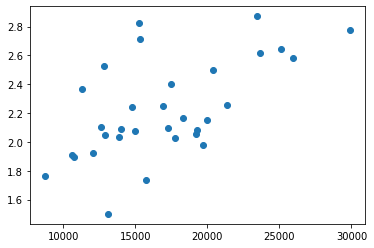

In [12]:
plt.scatter(df['dp'], df['img_flower_cluster'])
plt.show()

In [2]:
import sys
import os
sys.path.append('/Users/ljs/smart_farm/smart_farm/Predictive_distribution/ml-room-master')
from predictor import Predictor

class LinearRegressionMLE(Predictor):
    def __init__(self):
        self.weights = None

    def train(self, train_x, train_y):
        bias = np.ones((train_x.shape[0], 1))
        X = np.concatenate((train_x, bias), axis = 1)
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(train_y)
        

    def predict(self, test_x):
        bias = np.ones((test_x.shape[0], 1))
        X = np.concatenate((test_x, bias), axis = 1)
        return X.dot(self.weights)